In [2]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt


In [6]:

yf.pdr_override()

# Calculate dates for now and one year ago
now = datetime.now()
one_year_ago = now - timedelta(days=365*10)

# List of stock tickers
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 
          'TSLA', 'LLY', 'V', 'TSM', 'JNJ', 'JPM', 'NVO', 
          'UNH', 'PG', 'HD', 'IDCBY', 'LVMUY', 'MA', 'DIS', 
          'PYPL', 'ADBE']

all_data = {}

for stock in stocks:
    # Fetch historical market data
    df = pdr.get_data_yahoo(stock, start=one_year_ago, end=now)
    
    # Calculate returns
    df['Return'] = df['Adj Close'].pct_change()
    
    # Store the data in the dictionary
    all_data[stock] = df

#bprint(df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

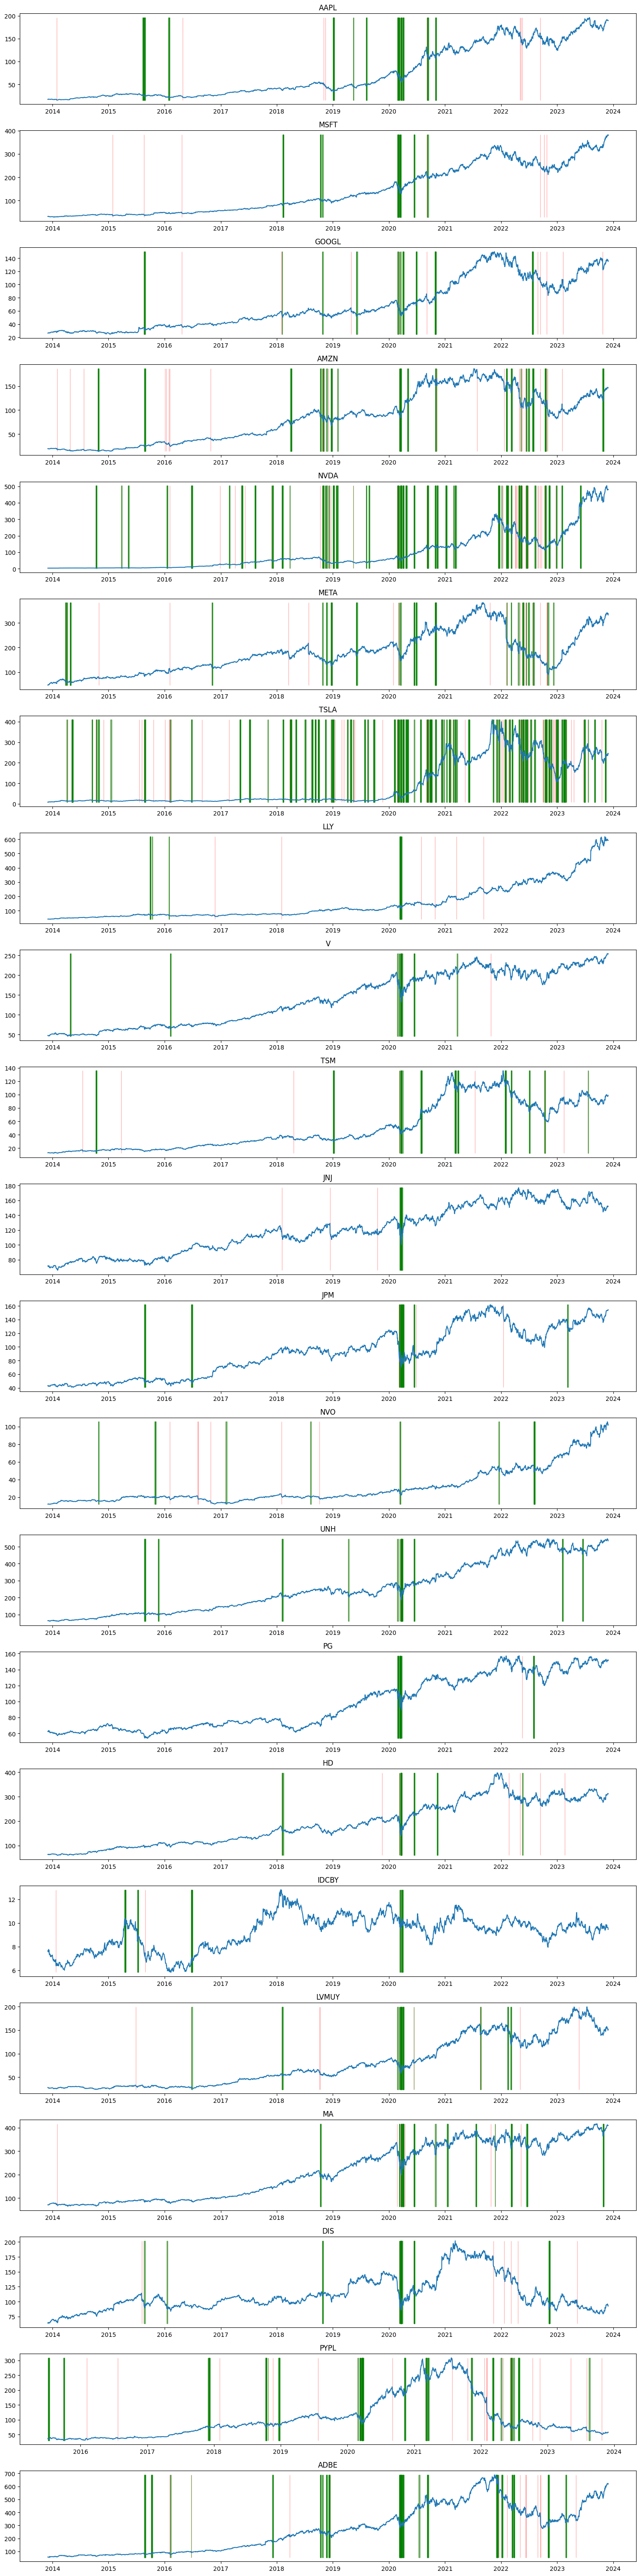

In [21]:
# Number of rows and columns for subplots
n_rows = 22
n_cols = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 60)) # Increased figure height for better visibility

for i, stock in enumerate(stocks):
    # Select subplot
    ax = axes[i]
    
    # Fetch data for this stock
    df = all_data[stock]
    
    # Plot data
    ax.plot(df.index, df['Adj Close'])
    ax.set_title(stock)
    
    # Highlight days with a percentage change of -0.05 or lower
    ax.fill_between(df.index, df['Adj Close'].min(), df['Adj Close'].max(), 
                    where=(df['Return'] <= -0.05), color='red', alpha=0.3)

    # Check for each day with a drop of -0.05 or lower if there's a day in the next 7 days where the price went up by 2% or more compared to the lower value
    drop_days = df[df['Return'] <= -0.05].index
    for drop_day in drop_days:
        next_days = df.loc[drop_day:drop_day + pd.Timedelta(days=7)]
        if any(next_days['Adj Close'] > df.loc[drop_day, 'Adj Close'] * 1.02):
            increase_days = next_days[next_days['Adj Close'] > df.loc[drop_day, 'Adj Close'] * 1.02].index
            for increase_day in increase_days:
                ax.fill_between([drop_day, increase_day], df['Adj Close'].min(), df['Adj Close'].max(), color='green', alpha=0.5)

plt.tight_layout()
plt.show()

In [23]:
# Create a DataFrame for returns
returns_df = pd.DataFrame({stock: df['Return'] for stock, df in all_data.items()})

# Flatten the DataFrame into a single series
all_returns = returns_df.values.flatten()

# Remove NaN values
all_returns = all_returns[~np.isnan(all_returns)]

# Convert to a pandas Series
all_returns = pd.Series(all_returns)

# Get statistical summary
stats = all_returns.describe()

print(stats)

count    57445.000000
mean         0.000523
std          0.046507
min         -1.443299
25%         -0.007148
50%          0.000181
75%          0.009121
max          6.551022
dtype: float64


<Axes: >

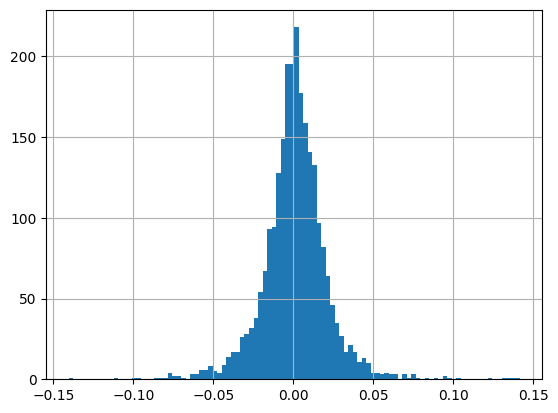

In [29]:
all_data['AMZN']['Return'].hist(bins=100)

In [ ]:
#every day evalute a list of preslected foundametnally promising stocks. find the ont that lost the most that day
#check if the lost beacuse of news and in case decide to buy them. 
#Aim for 2% profit in a week. 